In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2

# Getting image Path

In [2]:
# initializing path
data_dir = Path('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')
train_dir = data_dir

In [3]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [4]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [5]:
# An empty list for inserting data into this list in (image_path, Label) format
train_data = []

In [7]:
# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

In [8]:
# Making a data frame using pandas (creating CSV file)
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

In [9]:
# Select random data row from the dataframe and show and index it.
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

image  label
0  CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Norm...      1
1  CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst...      0
2  CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Norm...      1
3  CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst...      0
4  CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst...      0

In [13]:
# Returns all the unique values of Label in train_data
train_data['label'].unique()

array([1, 0, 3, 2], dtype=int64)

In [14]:
# Returns number of rows and columns
train_data.shape

(12446, 2)

# Available Dataset (Plotting Graph)

In [15]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

1    5077
0    3709
3    2283
2    1377
Name: label, dtype: int64

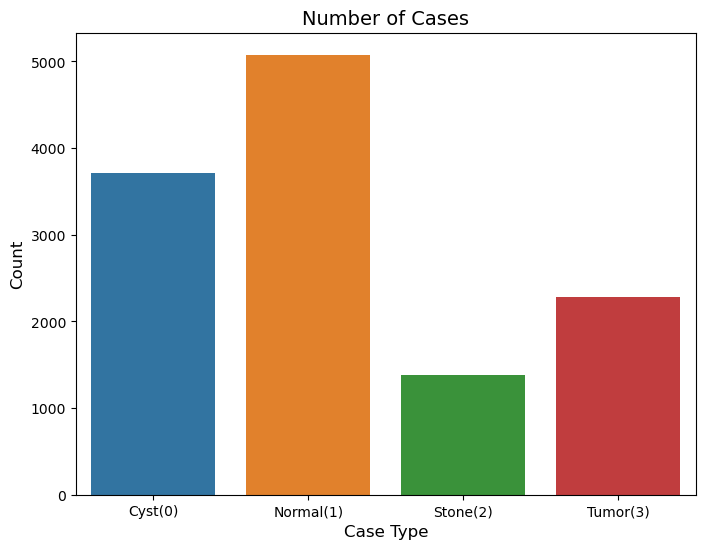

In [16]:
# Plotting the Graph 
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

# CT Scanned Images Available 

In [17]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples



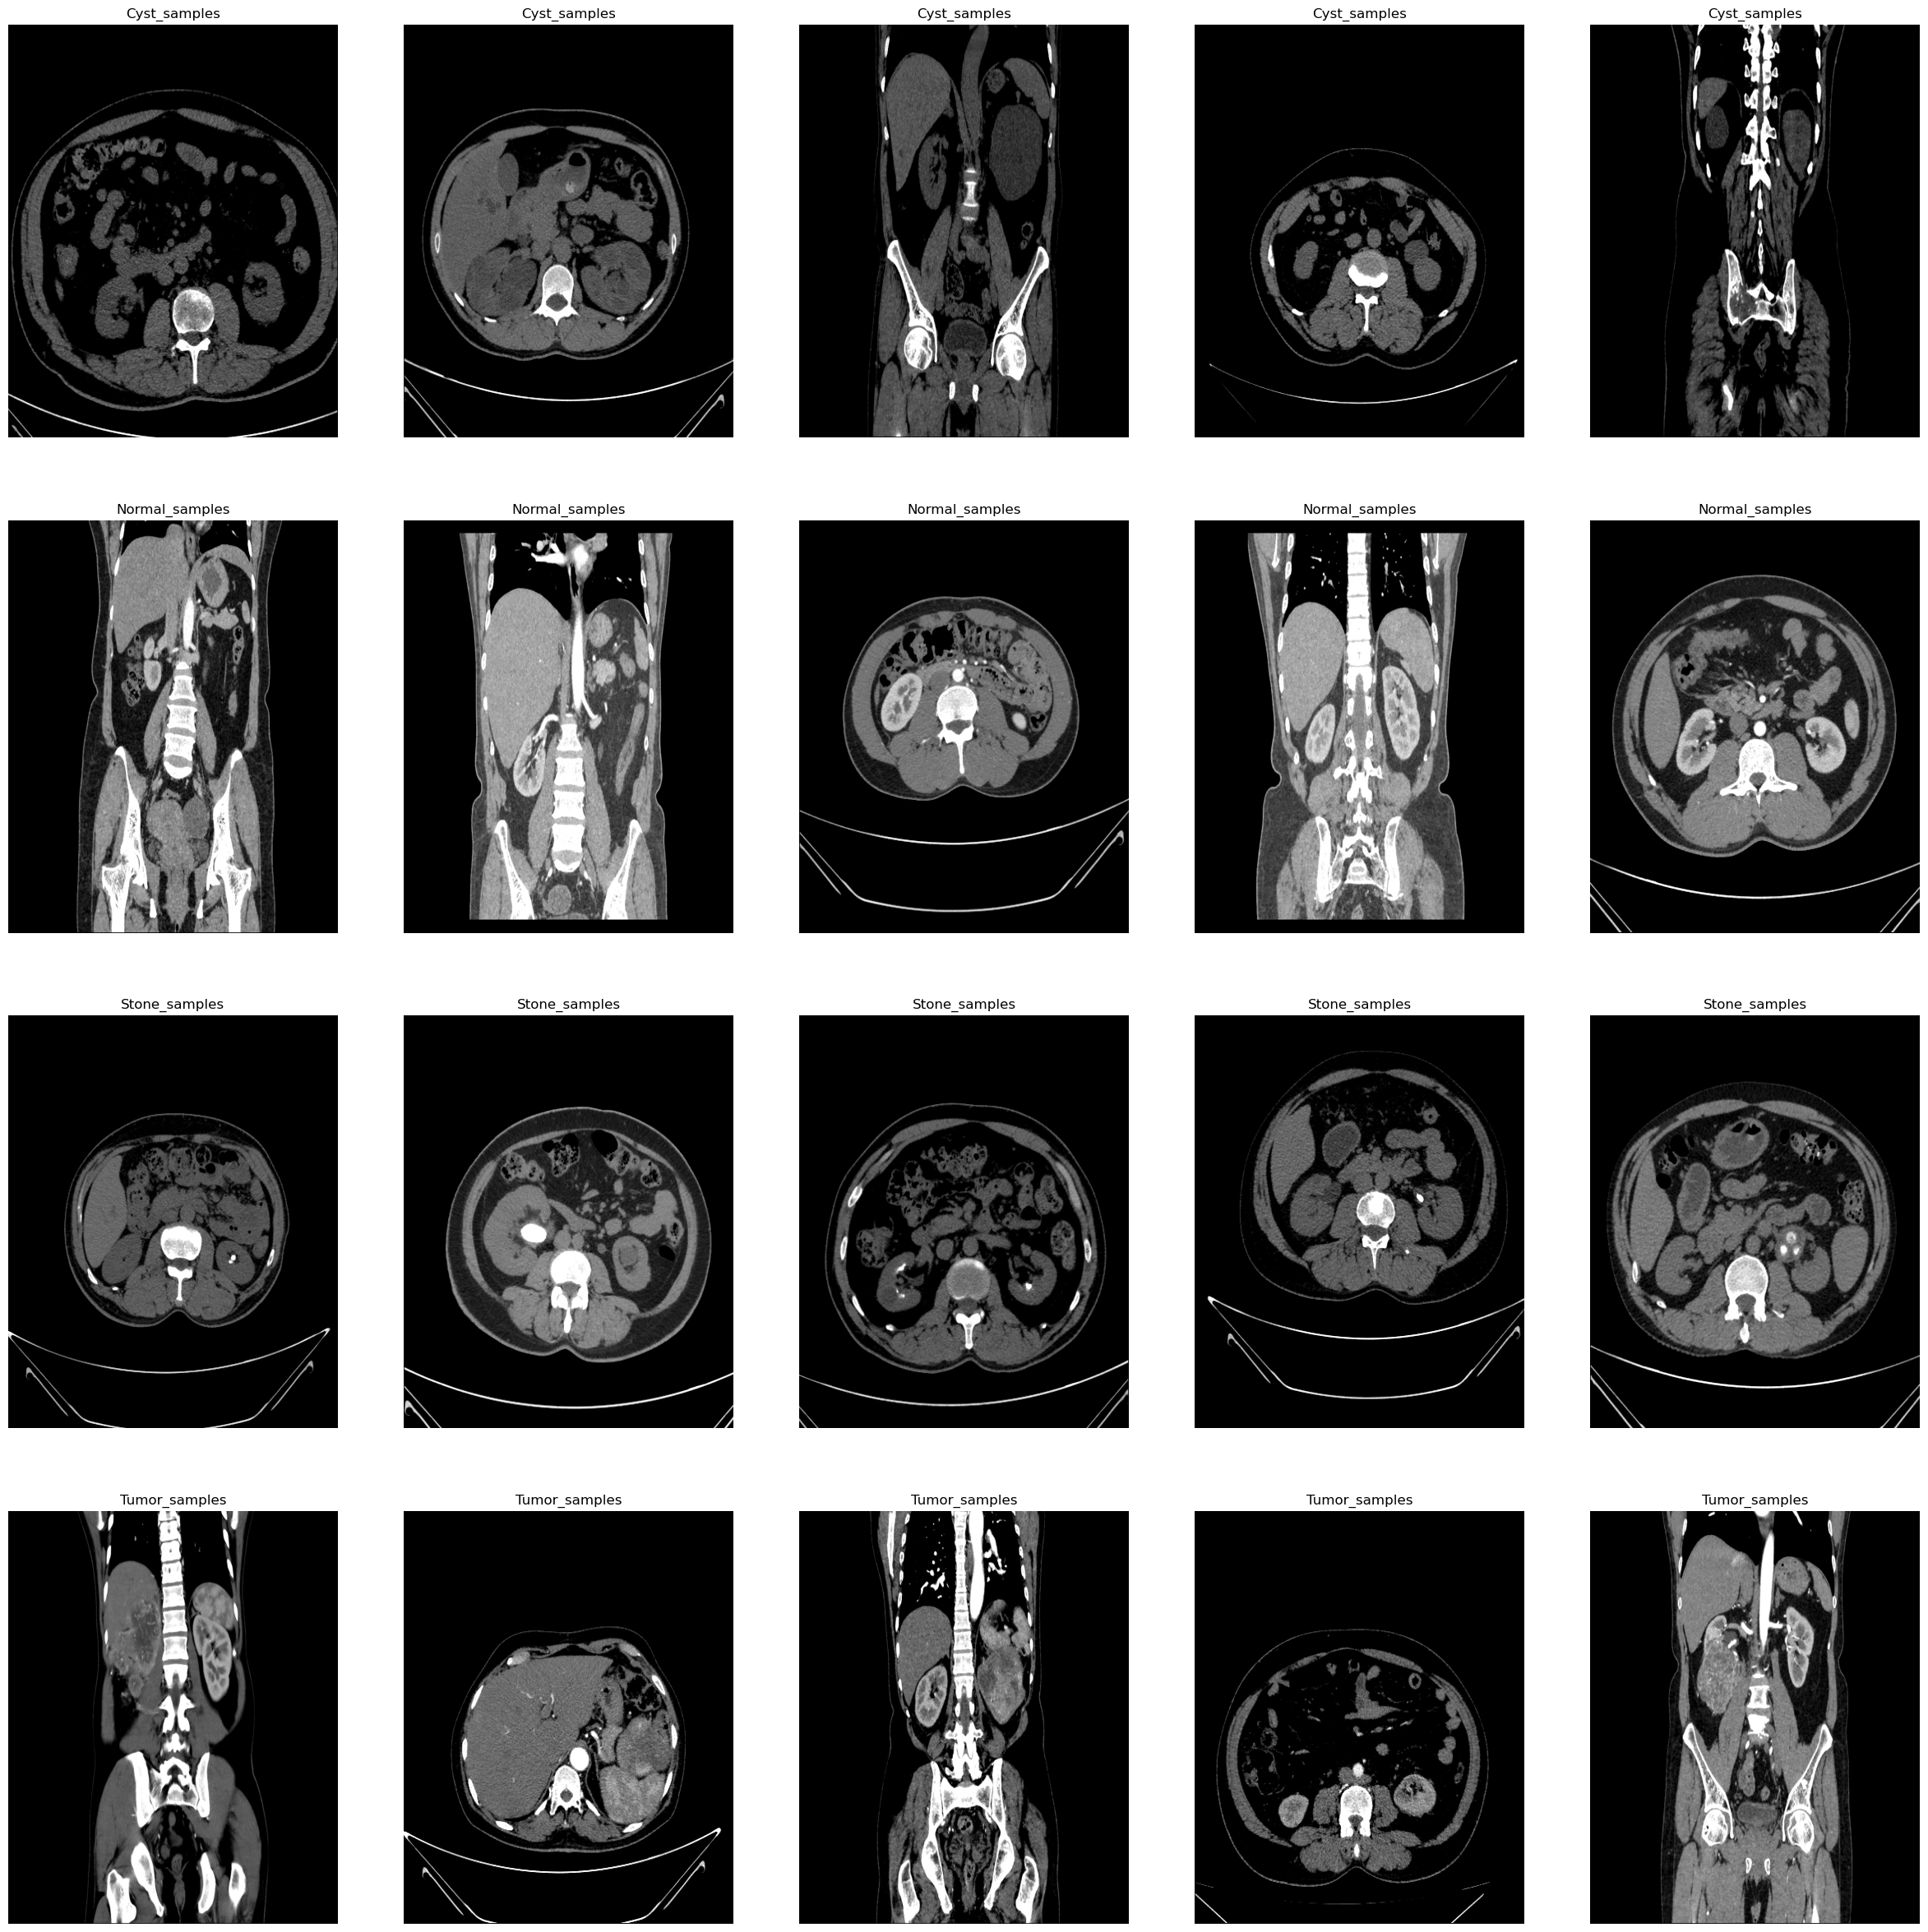

In [18]:
# Displaying the picture
f, ax = plt.subplots(4, 5,figsize=(30,30)) # Initilizing the graph where image is to be display

for i in range(20):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image
    
    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()
    

In [21]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [22]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

In [17]:
# for img in Cyst_cases:
#     img = cv2.imread(str(img)) # Loading image
#     img = cv2.resize(img, (100,100)) # resizing image 4
#     if img.shape[2] == 1: # Number of channel in the dimension.
#         img = np.dstack([img, img, img])
    
#     print(img.shape)
#     plt.imshow(img)
#     break

# Data Pre Processing

Image is in form  of 3D array 
And numpy Array converts ot into 4D array

In [23]:

for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image 
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst' 
    train_data.append(img)
    train_labels.append(label)

In [24]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [25]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [26]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [27]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (12446, 28, 28, 3)
Total number of Labels :  (12446,)


In [28]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.76862745, 0.76862745, 0.76862745],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [29]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

label
0       Cyst
1       Cyst
2       Cyst
3       Cyst
4       Cyst
...      ...
12441  Tumor
12442  Tumor
12443  Tumor
12444  Tumor
12445  Tumor

[12446 rows x 1 columns]

In [30]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [31]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [32]:
train_labels1

label
0          0
1          0
2          0
3          0
4          0
...      ...
12441      3
12442      3
12443      3
12444      3
12445      3

[12446 rows x 1 columns]

In [33]:
print(train_data1.shape)
print(train_labels1.shape)

(12446, 28, 28, 3)
(12446, 1)


In [34]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    0
dtype: int64

# Solving Image Dataset Imblance Using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
smt = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smt.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

# Balanced Dataset after using SMOTE

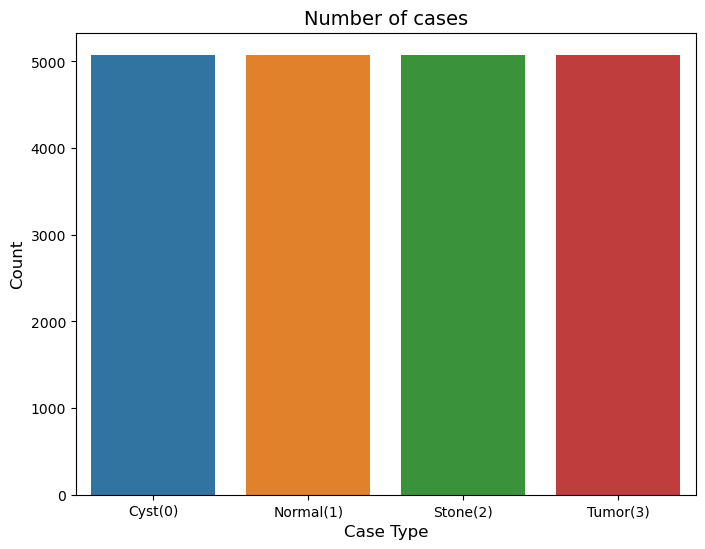

In [36]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [37]:
train_data2.shape

(20308, 2352)

In [38]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape


(20308, 28, 28, 3)

In [39]:
train_data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.        , 0.        , 0.        ],
        

# Splitting the Dataset For training and testing using sklearn : train_test_split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.25,random_state = 42) # With random_state=42, we get the same train and test sets across different executions

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[0].shape)

(15231, 28, 28, 3)
(5077, 28, 28, 3)
(15231, 1)
(5077, 1)
(28, 28, 3)


# Data Augmentation 
It is a process in which we can transform 1 data into many forms for the better alaysing of the data by the Model to get more detail view of image so it can predict the output.
Basically data augmentation is perform to increase the robustness of the Machine learning Model.

https://www.youtube.com/watch?v=hxLU32zhze0

In [104]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

In [105]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
x_train2.shape

(15231, 2352)

In [106]:
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

# #RANDOM FOREST

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train2, y_train)
y_pred=model.predict(x_test2)
y_pred

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6720\2286763451.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train2, y_train)


array([1, 0, 2, ..., 2, 0, 1], dtype=int64)

In [108]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1267
           1       1.00      1.00      1.00      1282
           2       1.00      1.00      1.00      1305
           3       1.00      1.00      1.00      1223

    accuracy                           1.00      5077
   macro avg       1.00      1.00      1.00      5077
weighted avg       1.00      1.00      1.00      5077



In [109]:
confusion_matrix(y_pred_knn,y_test)

array([[1267,    0,    0,    0],
       [   0, 1282,    0,    0],
       [   0,    0, 1305,    0],
       [   0,    0,    0, 1223]], dtype=int64)

# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train2,y_train)
y_pred_knn=knn.predict(x_test2)
y_pred_knn

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 2, ..., 2, 0, 1], dtype=int64)

In [111]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1267
           1       1.00      1.00      1.00      1282
           2       1.00      1.00      1.00      1305
           3       1.00      1.00      1.00      1223

    accuracy                           1.00      5077
   macro avg       1.00      1.00      1.00      5077
weighted avg       1.00      1.00      1.00      5077



In [112]:
confusion_matrix(y_pred_knn,y_test)


array([[1267,    0,    0,    0],
       [   0, 1282,    0,    0],
       [   0,    0, 1305,    0],
       [   0,    0,    0, 1223]], dtype=int64)

# CNN (Convulutional Neural Network)

https://www.youtube.com/watch?v=zfiSAzpy9NM

In [83]:
from tensorflow.keras import layers,models

model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        #layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
Total params: 16,976
Trainable params: 16,976
Non-trai

In [84]:

model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 640)              

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/100
476/476 [==============================] - 23s 44ms/step - loss: 0.3146 - accuracy: 0.8814 - val_loss: 0.0253 - val_accuracy: 0.9953
Epoch 2/100
476/476 [==============================] - 16s 33ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0113 - val_accuracy: 0.9982
Epoch 3/100
476/476 [==============================] - 13s 28ms/step - loss: 0.0328 - accuracy: 0.9909 - val_loss: 0.0242 - val_accuracy: 0.9909
Epoch 4/100
476/476 [==============================] - 13s 28ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0143 - val_accuracy: 0.9959
Epoch 5/100
476/476 [==============================] - 13s 28ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0065 - val_accuracy: 0.9976
Epoch 6/100
476/476 [==============================] - 13s 28ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0110 - val_accuracy: 0.9972
Epoch 7/100
476/476 [==============================] - 14s 29ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0079 - val_ac

KeyboardInterrupt: 

In [86]:
pic = []
#img = X_train[122]
image='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (2343).jpg'
img = cv2.imread(str(image))
# Importing Image module from PIL package
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("Stone_image.jpg")

In [87]:
img = cv2.resize(img, (28,28))
#if img.shape[2] ==1:
 #   img = np.dstack([img, img, img])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img=np.array(img)
#img = img/255
pic.append(img)
pic1 = np.array(pic)

In [88]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 70ms/step


array([[-3.4398906,  7.1179237, -1.9932488, -1.8912338]], dtype=float32)

In [89]:
a.argmax()

1

In [ ]:
#image='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (67).jpg'
#img = cv2.imread(str(image))
# Importing Image module from PIL package 
#from PIL import Image 
#import PIL 
  
# creating a image object (main image) 
#im1 = Image.open(image) 
  
# save a image using extension
#im1 = im1.save("kidney_tumor.jpg")

In [ ]:
#a=model.predict(im1)
#a

In [ ]:
#a.argmax()